In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from scipy.stats import norm
from scipy import misc
from mpl_toolkits.mplot3d import Axes3D
from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, r2_score
from keras.layers.pooling import MaxPooling2D, GlobalAveragePooling2D
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
#import umap
import time
import glob
import sys
import scipy
sns.set(style="darkgrid", context="talk", palette="Set2")
RANDOM_STATE = 2401
np.random.seed(RANDOM_STATE)

%matplotlib inline

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/drive/MyDrive/dataset/food_cat"))

# Any results you write to the current directory are saved as output.

['test', 'train']


In [ ]:
images = []
label = []
folders = ["/content/drive/MyDrive/dataset/food_cat/train/fried_rice", "/content/drive/MyDrive/dataset/food_cat/train/ramen"]
for folder in folders:
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img,(256,256))
        if img is not None:
            images.append(img)
            label.append(folder.split("/")[-1])

In [ ]:
X_train = np.asarray(images)
label = [1 if name == "fried_rice" else 0 for name in label]
Y_train = np.asarray(label)

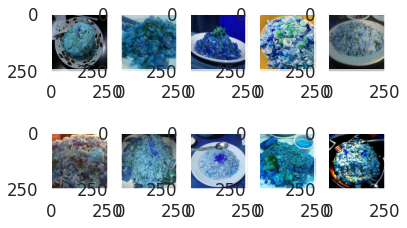

In [ ]:
for i in range(1,11):
    plt.subplot(2, 5, i)
    plt.imshow(images[i])

In [9]:
images = []
ids = []
folders = ["/content/drive/MyDrive/dataset/food_cat/test"]
for folder in folders:
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img,(256,256))
        if img is not None:
            images.append(img)
            ids.append(filename)

In [10]:
x_test = np.asarray(images)

In [11]:
from keras.applications.inception_v3 import InceptionV3
 
inception_conv = InceptionV3(include_top=False, weights='imagenet', input_shape=(256, 256, 3))

87924736/87910968 [==============================] - 1s 0us/step


In [12]:
X_train.shape

(1600, 256, 256, 3)

In [13]:
img_rows, img_cols = 256, 256

batch_size = 100
num_classes = 2
epochs = 10

x_train, x_val, y_train, y_val = train_test_split(X_train,Y_train,test_size=0.25,random_state=RANDOM_STATE)

if K.image_data_format() == 'th':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_val = x_val.reshape(x_val.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)
    
x_train = x_train.astype('float32')
x_train = x_train/255.0
x_val = x_val.astype('float32')
x_val = x_val/255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
print(y_train)

x_train shape: (1200, 256, 256, 3)
1200 train samples
400 test samples
[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [14]:
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [16]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(inception_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 1024)              75498496  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 97,303,330
Trainable params: 97,268,898
Non-trainable params: 34,432
_________________________________________________________________


In [17]:
x_train.shape

(1200, 256, 256, 3)

In [18]:
model.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adam(),metrics=['acc'])
# Train the model
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_val, y_val))
# Save the model
model.save('/content/drive/MyDrive/dataset/food_cat/eksperimen1.h5')

Epoch 1/10
12/12 [==============================] - 713s 59s/step - loss: 13.0348 - acc: 0.4842 - val_loss: 222437.6875 - val_acc: 0.5050
Epoch 2/10
12/12 [==============================] - 710s 60s/step - loss: 1.0450 - acc: 0.5183 - val_loss: 212969.3438 - val_acc: 0.5050
Epoch 3/10
12/12 [==============================] - 703s 59s/step - loss: 0.8769 - acc: 0.5233 - val_loss: 43991.5664 - val_acc: 0.5050
Epoch 4/10
12/12 [==============================] - 706s 59s/step - loss: 0.8289 - acc: 0.5183 - val_loss: 602.7649 - val_acc: 0.5150
Epoch 5/10
12/12 [==============================] - 703s 59s/step - loss: 0.8552 - acc: 0.5417 - val_loss: 3982.5149 - val_acc: 0.5050
Epoch 6/10
12/12 [==============================] - 702s 59s/step - loss: 0.7281 - acc: 0.6333 - val_loss: 1080.2838 - val_acc: 0.5275
Epoch 7/10
12/12 [==============================] - 701s 59s/step - loss: 0.6238 - acc: 0.7067 - val_loss: 1259.7980 - val_acc: 0.5050
Epoch 8/10
12/12 [==============================] 

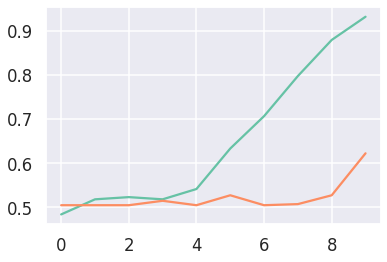

In [19]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.show()

In [20]:
y_pred = model.predict_classes(x_val)
cm = confusion_matrix(np.argmax(y_val,axis=1),y_pred)

ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd") #-___-
ax.set_title('Confusion Matrix Convolutional Neural Network')
#ax.set_yticklabels(le.inverse_transform([1,0]))
#ax.set_xticklabels(le.inverse_transform([0,1]))
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()

AttributeError: ignored

In [ ]:
y_pred_test = model.predict_classes(x_test)

df = pd.DataFrame(columns=['id','kelas'])
df['id'] = ids.copy()
df['kelas'] = y_pred_test.copy()

In [ ]:
df

In [ ]:
df.to_csv('/content/drive/MyDrive/dataset/food_cat/foodcat_pred.csv', sep=',')